# Dates and times

We'll get to the thorny issue of dates in a moment, but first let's look at a little timer function to time your code.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/sciris/sciris/HEAD?labpath=docs%2Ftutorials%2Ftut_dates.ipynb) to open an interactive version of this notebook.
    
</div>


## Timing

The most basic form of profiling (as covered in the previous tutorial) is just timing how long different parts of your code take. It's not _too_ hard to do this in Python:

In [1]:
import time
import numpy as np

n = 5_000

start = time.time()
zeros = np.zeros((n,n))
zeros_time = time.time()
rand = np.random.rand(n,n)
rand_time = time.time()

print(f'Time to make zeros: {(zeros_time - start):n} s')
print(f'Time to make random numbers: {(rand_time - zeros_time):n} s')

Time to make zeros: 5.126e-05 s
Time to make random numbers: 0.10083 s


As you probably could've guessed, in Sciris there's an easier way, inspired my Matlab's [tic and toc](https://www.mathworks.com/help/matlab/ref/tic.html):

In [2]:
import sciris as sc

T = sc.timer()

T.tic()
zeros = np.zeros((n,n))
T.toc('Time to make zeros')

T.tic()
rand = np.random.rand(n,n)
T.toc('Time to make random numbers')

Time to make zeros: 44.1 μs
Time to make random numbers: 99.7 ms


We can simplify this even further: we often call `toc()` followed by `tic()`, so instead we can just call `toctic()` or `tt()` for short; w can also omit the first `tic()`:

In [3]:
T = sc.timer()

zeros = np.zeros((n,n))
T.tt('Time to make zeros')

rand = np.random.rand(n,n)
T.tt('Time to make random numbers')

Time to make zeros: 78.9 μs
Time to make random numbers: 0.100 s


You can also use `sc.timer()` in a `with` block, which is perhaps most intuitive of all:

In [4]:
with sc.timer('Time to make zeros'):
    zeros = np.zeros((n,n))

with sc.timer('Time to make random numbers'):
    rand = np.random.rand(n,n)

Time to make zeros: 29.8 μs
Time to make random numbers: 98.1 ms


If we have multiple timings, we can also do statistics on them or plot the results:

Generating 291,419 numbers: 1.66 ms
Generating 1,106,824 numbers: 3.89 ms
Generating 2,782,793 numbers: 8.66 ms
Generating 1,126,154 numbers: 3.65 ms
Generating 454,981 numbers: 1.53 ms
mean 0.003877401351928711
std 0.0025820810532737005
min 0.0015316009521484375
max 0.008658170700073242


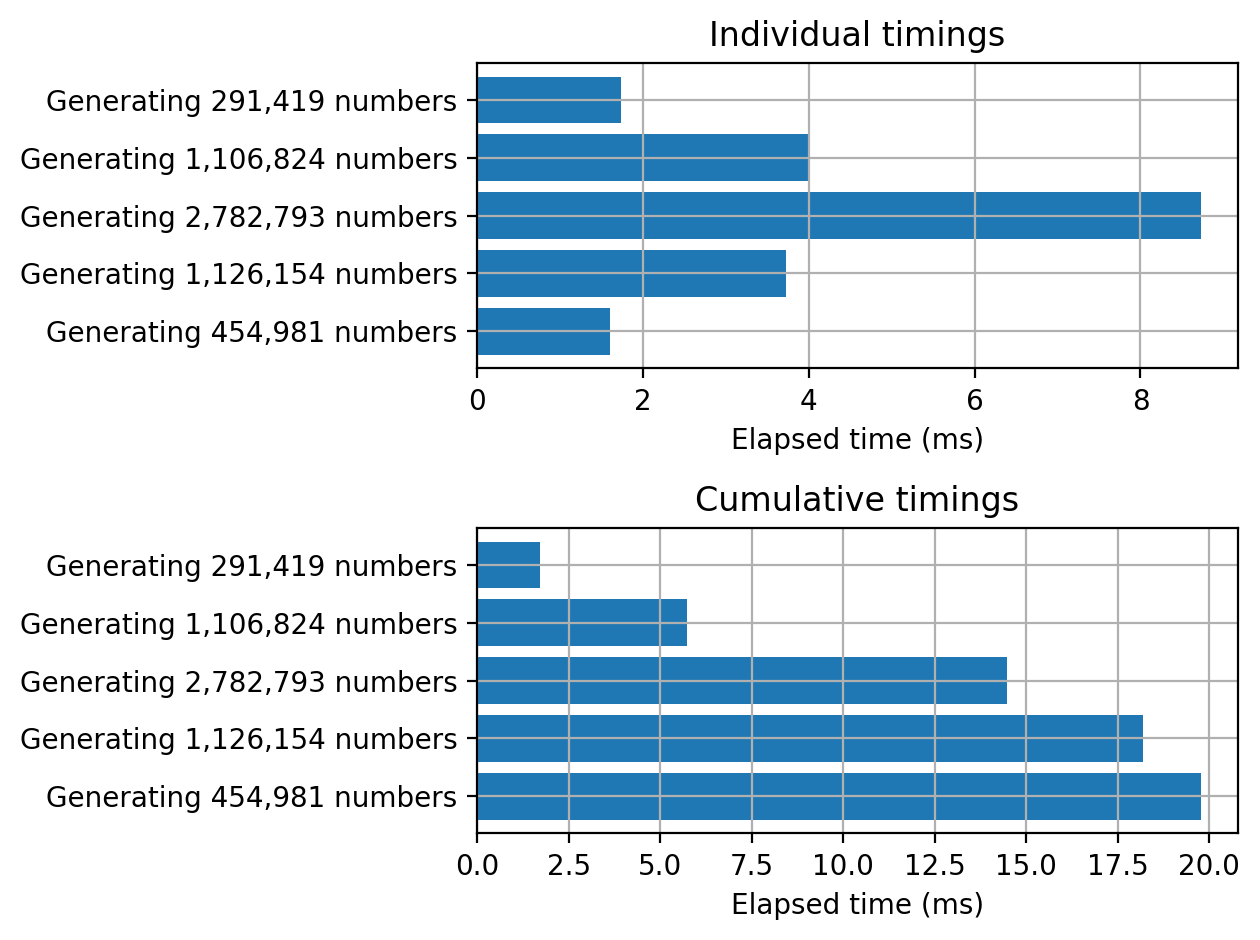

In [11]:
T = sc.timer()

for i in range(5):
    rnd = np.random.rand(int((i+1)*np.random.rand()*1e6))
    T.tt(f'Generating {len(rnd):,} numbers')

print('mean', T.mean())
print('std',  T.std())
print('min',  T.min())
print('max',  T.max())
T.plot();

## Dates

There are lots of different common date formats in Python, which probably arose through a process [like this](https://xkcd.com/927/). Python's built-in one is [`datetime.datetime`](https://docs.python.org/3/library/datetime.html). This format has the basics, but is hard to work with for things like plotting. Numpy made their own, called [`datetime64`](https://numpy.org/doc/stable/reference/arrays.datetime.html), which addresses some of these issues, but isn't compatible with anything else. Then pandas introduced their own [`Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html), which is kind of like a combination of both.

You will probably be relieved to know that Sciris does _not_ introduce a new datetime format, but instead tries to make it easier to work with the other formats, particularly by being able to easily interconvert them.

In [6]:
import sciris as sc

sc.findinds([1,2,3],2)

array([1])